AVISHEK ROY SPARSHO
20301269
avishek.roy.sparsho@g.bracu.ac.bd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [26]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [18]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline
plt.rc('font', size = 11)
sns.set_style('darkgrid')

In [ ]:
##PRE-PROCESSING
#Null value: 0
#Duplicate: 0

initial_dataset = pd.read_csv('/content/drive/MyDrive/traffic_violaions.csv')
initial_dataset.head()

initial_dataset.info()

initial_dataset.isnull().sum()

initial_dataset[initial_dataset.duplicated()]

initial_dataset.shape  #shows (row and column) size in dataset

#statistical measures about the data
initial_dataset.describe()

for item in initial_dataset.columns:
    print(item,"=>",len(initial_dataset[item].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB
stop_

In [34]:
df = pd.read_csv('/content/drive/MyDrive/traffic_violaions.csv')
df.head()


,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


stop_date                 0
stop_time                 1
country_name          52966
driver_gender          3386
driver_age_raw         3378
driver_age             3620
driver_race            3385
violation_raw          3385
violation              3385
search_conducted          1
search_type           50881
stop_outcome           3385
is_arrested            3385
stop_duration          3385
drugs_related_stop        1
dtype: int64

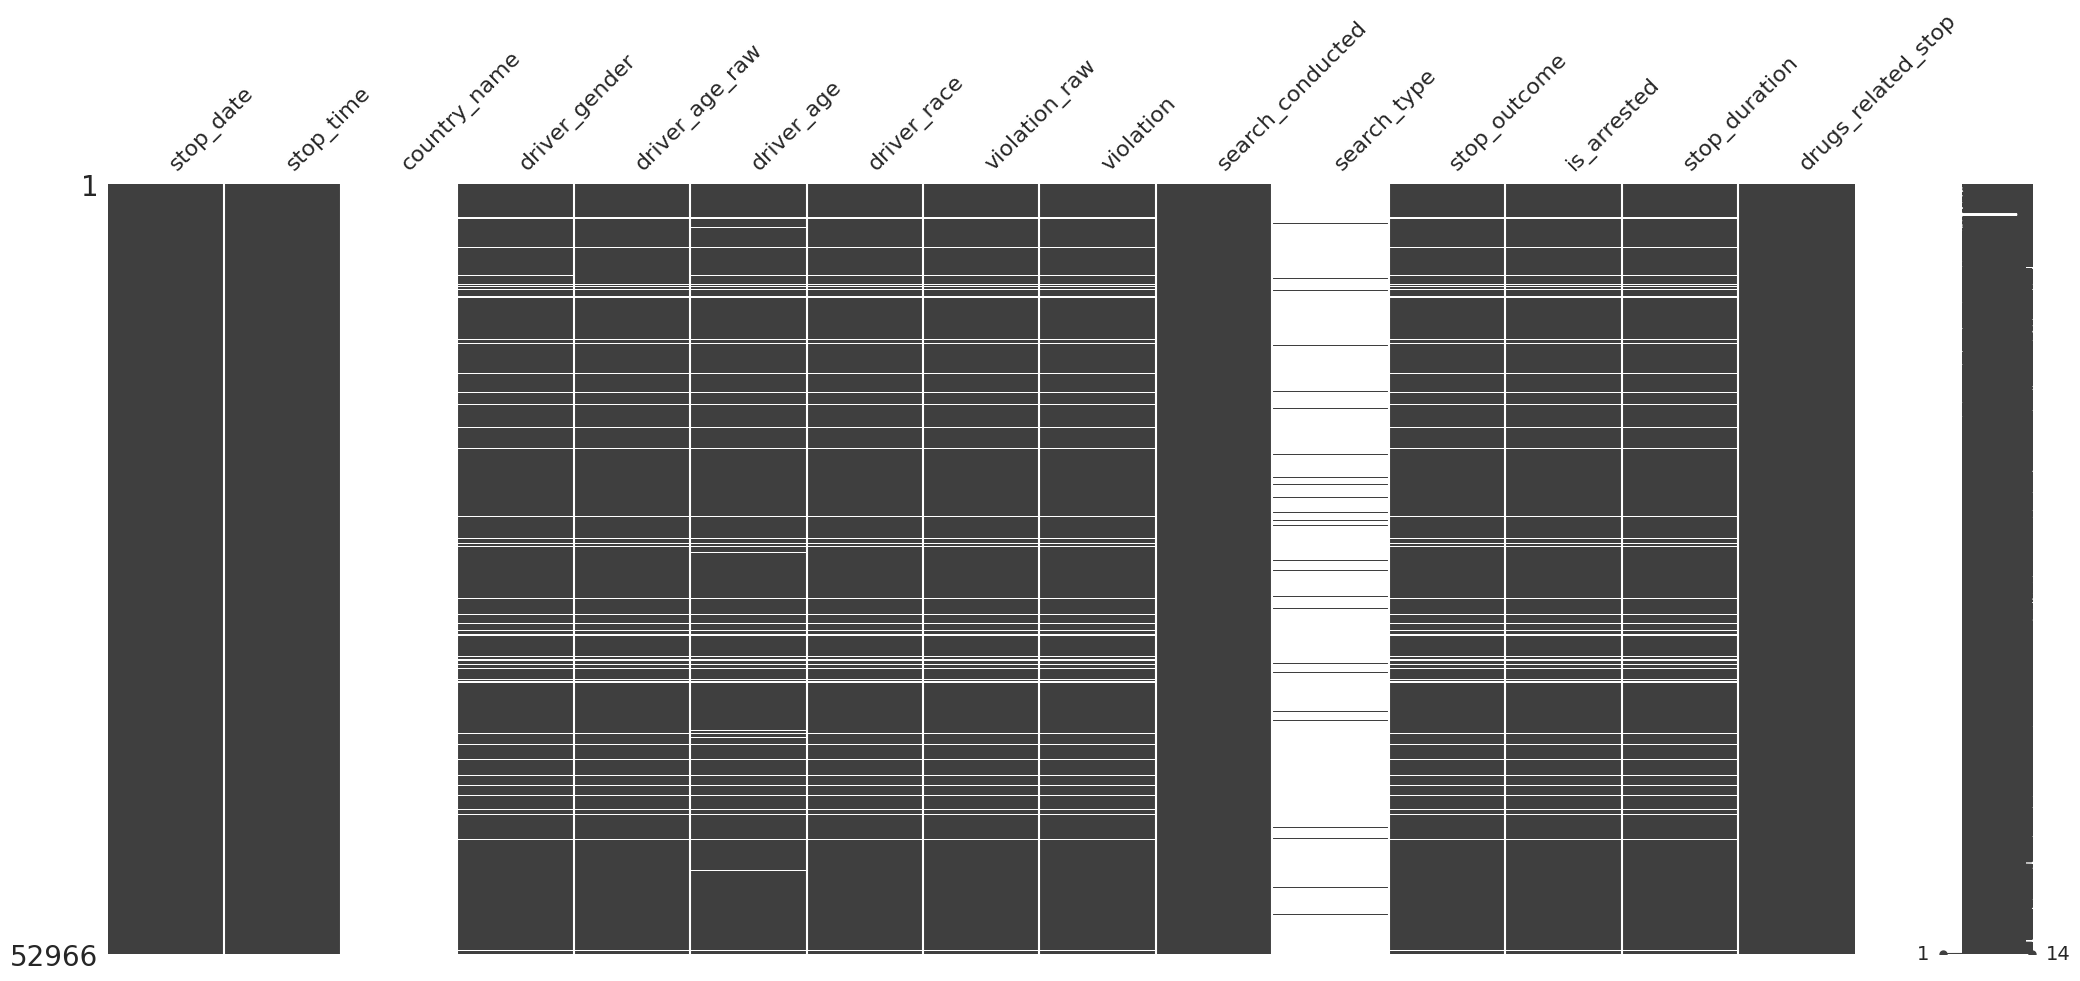

In [29]:
ms.matrix(df);
df1 = df.copy(deep=True)
df1.drop(columns = ['country_name','search_type','driver_age_raw'], inplace=True)
df1.dropna(subset = ['driver_gender'], inplace = True)
df.isna().sum()


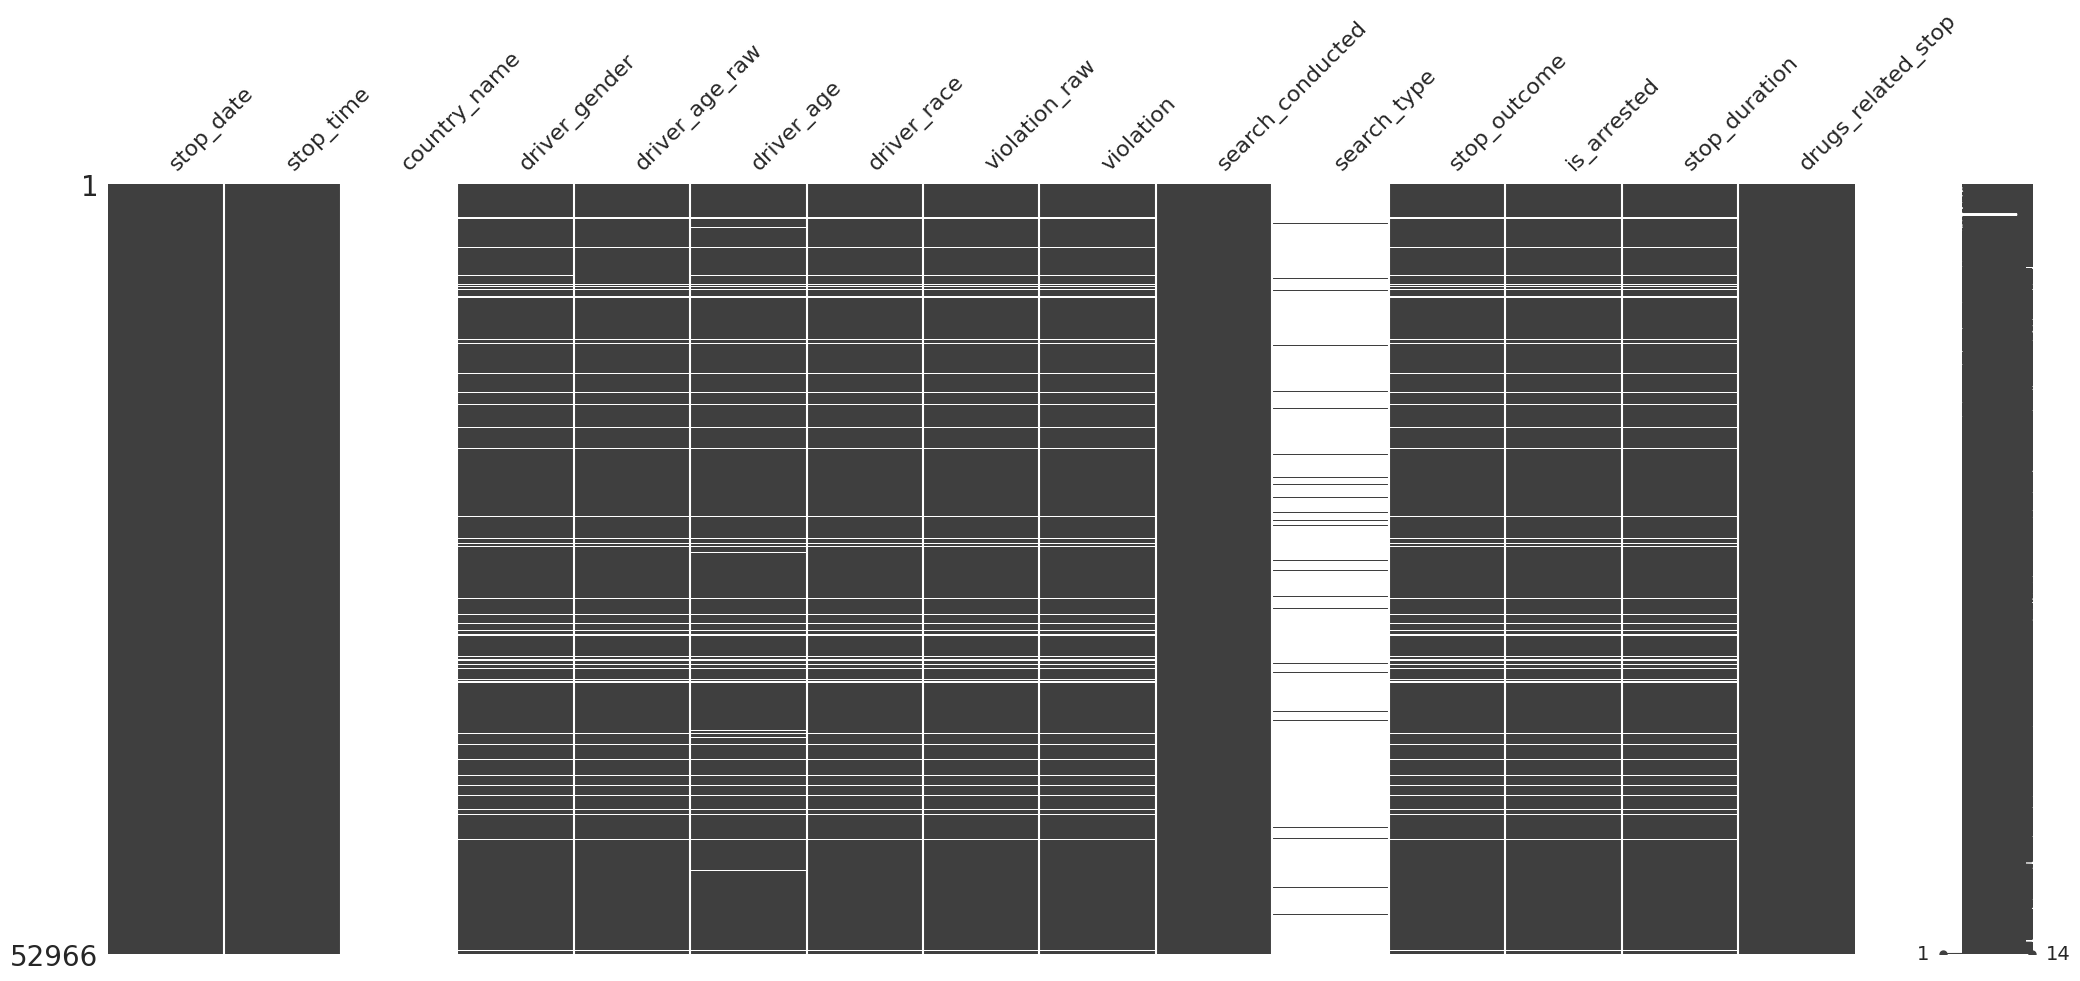

In [30]:
df2 = df1.copy(deep=True)
df2['driver_age'] = df2['driver_age'].fillna(df.groupby('driver_gender')['driver_age'].transform('median'))
ms.matrix(df);

In [37]:
df1 = df.copy(deep=True)
df1.drop(columns = ['country_name','search_type','driver_age_raw'], inplace=True)
df1.dropna(subset = ['driver_gender'], inplace = True)

In [39]:
df.isna().sum()

stop_date                 0
stop_time                 1
country_name          52966
driver_gender          3386
driver_age_raw         3378
driver_age             3620
driver_race            3385
violation_raw          3385
violation              3385
search_conducted          1
search_type           50881
stop_outcome           3385
is_arrested            3385
stop_duration          3385
drugs_related_stop        1
dtype: int64

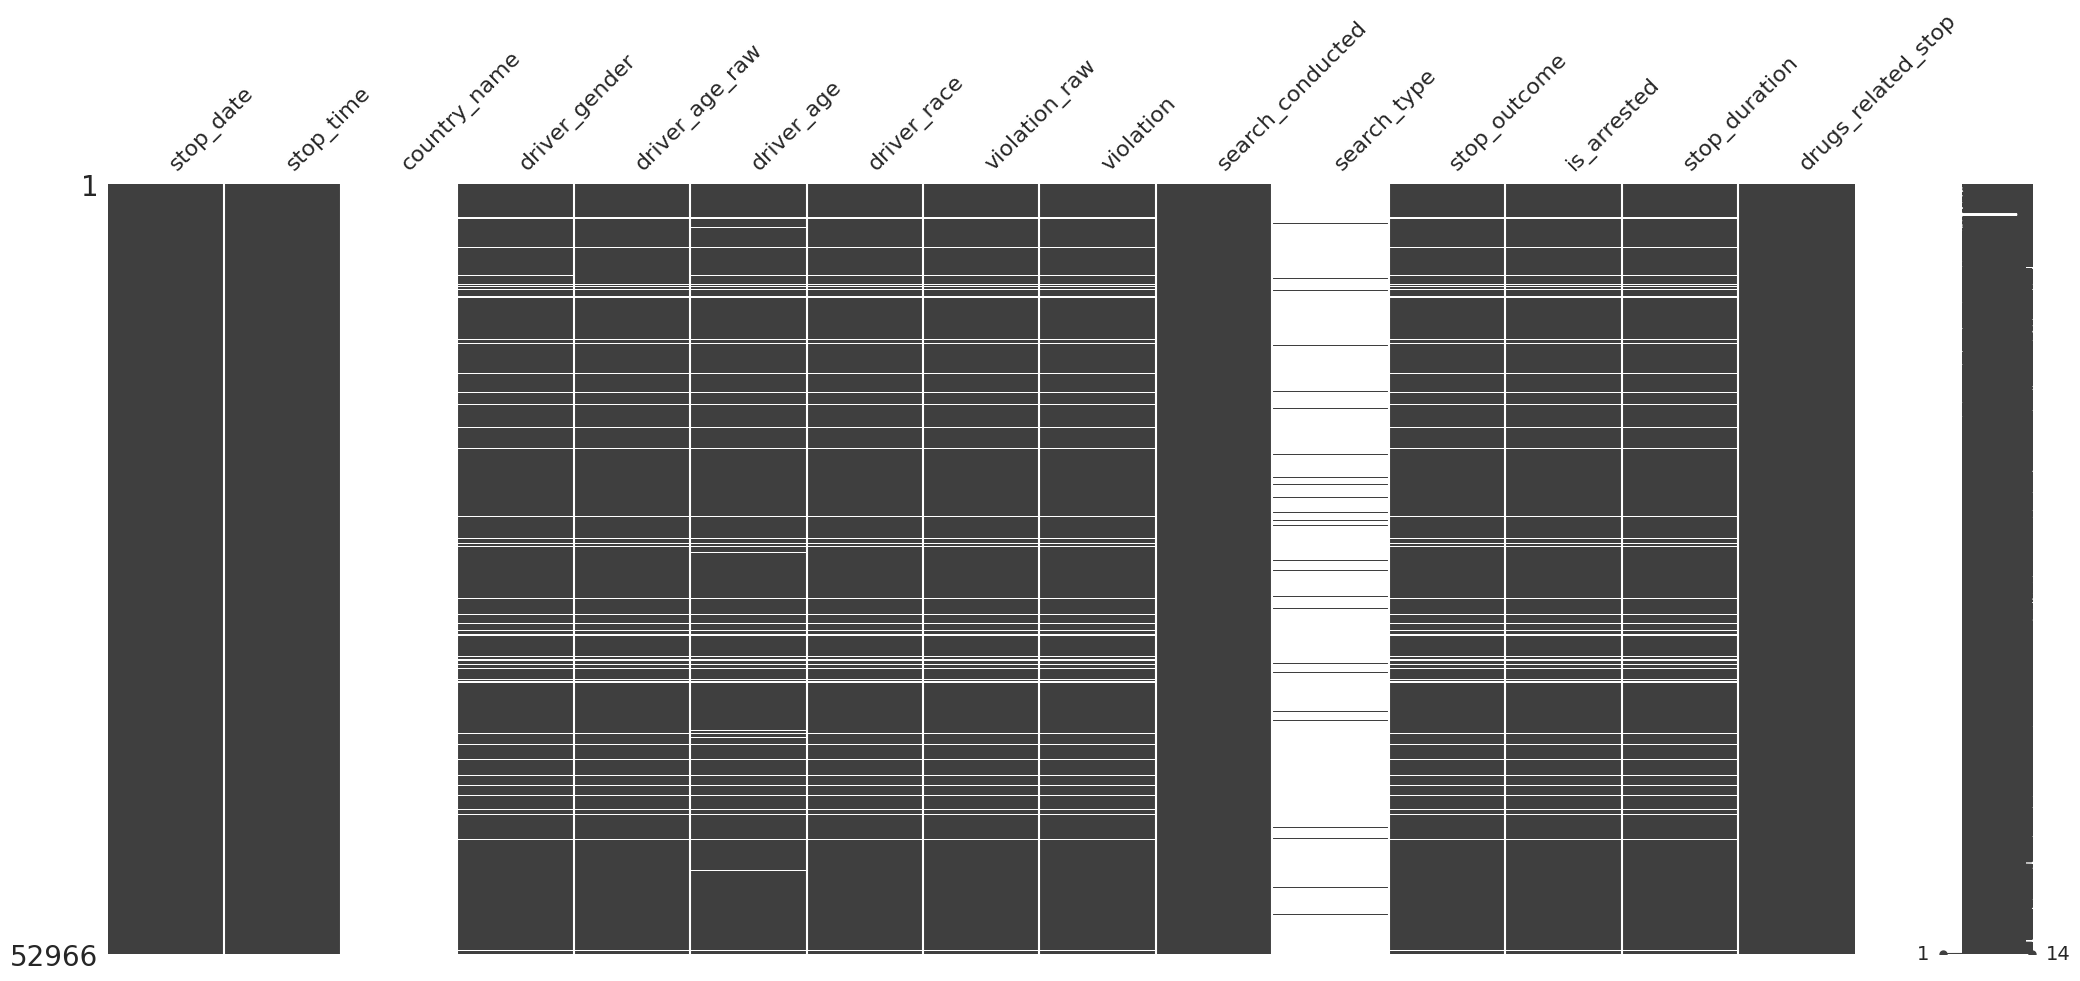

In [40]:
df2 = df1.copy(deep=True)
df2['driver_age'] = df2['driver_age'].fillna(df.groupby('driver_gender')['driver_age'].transform('median'))
ms.matrix(df);

In [54]:
data = df2.copy(deep=True)
pd.to_datetime(data['stop_time'])
data['stop_hour'] = pd.to_datetime(data['stop_time'], format = '%H:%M').dt.hour

data['stop_duration'].value_counts()
data['stop_duration'] = data['stop_duration'].map({'0-15 Min':7.5,'16-30 Min':23,'30+ Min':45})
stop_duration_based_on_race = data.groupby('driver_race')[['stop_duration']].mean()

data.search_conducted = data.search_conducted.replace(to_replace=[True, False], value=[1, 0])
data.drugs_related_stop = data.drugs_related_stop.replace(to_replace=[True, False], value=[1, 0])
data['stop_date'] = pd.to_datetime(data['stop_date'])
data['stop_Year'] = pd.DatetimeIndex(data['stop_date']).year
#yearly_data = data.groupby('stop_Year').sum()
#yearly_data.reset_index(inplace = True)

search_conducted = len(data[data.search_conducted == True])
arrested_after_search = len(data[(data.search_conducted == True) & (data.is_arrested == True)])
arrested = ((arrested_after_search/search_conducted)*100)
not_arrested = (100-(arrested))

In [55]:
data.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour,stop_Year
0,2005-01-02,1:55,M,20.0,White,Speeding,Speeding,0,Citation,False,7.5,0,1,2005
1,2005-01-18,8:15,M,40.0,White,Speeding,Speeding,0,Citation,False,7.5,0,8,2005
2,2005-01-23,23:15,M,33.0,White,Speeding,Speeding,0,Citation,False,7.5,0,23,2005
3,2005-02-20,17:15,M,19.0,White,Call for Service,Other,0,Arrest Driver,True,23.0,0,17,2005
4,2005-03-14,10:00,F,21.0,White,Speeding,Speeding,0,Citation,False,7.5,0,10,2005


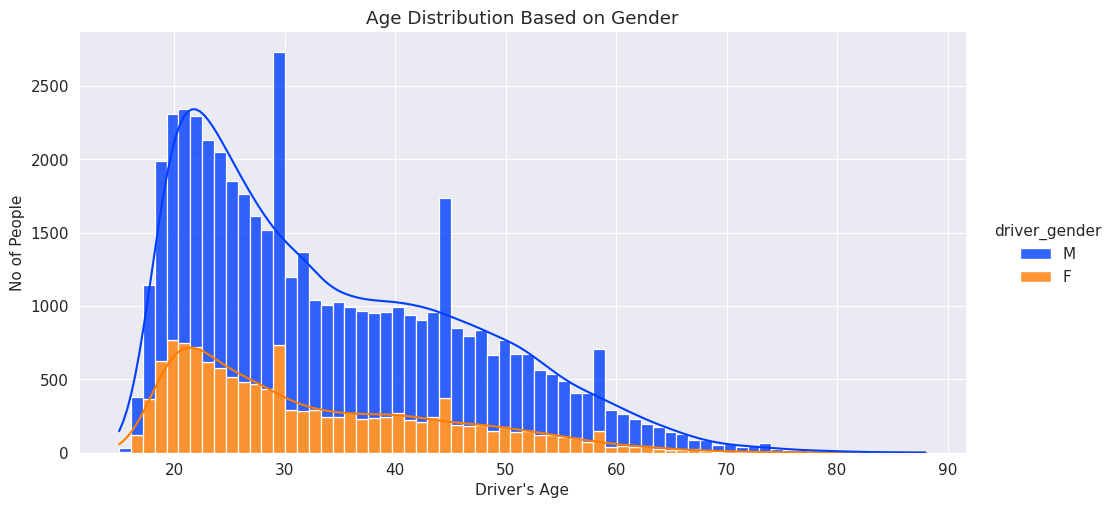

In [56]:
sns.displot(x = 'driver_age', hue = 'driver_gender', kde = True, data = data,
            multiple = 'stack', alpha = 0.8, palette = "bright", height=5, aspect=2)
plt.title('Age Distribution Based on Gender')
plt.xlabel("Driver's Age")
plt.ylabel("No of People");

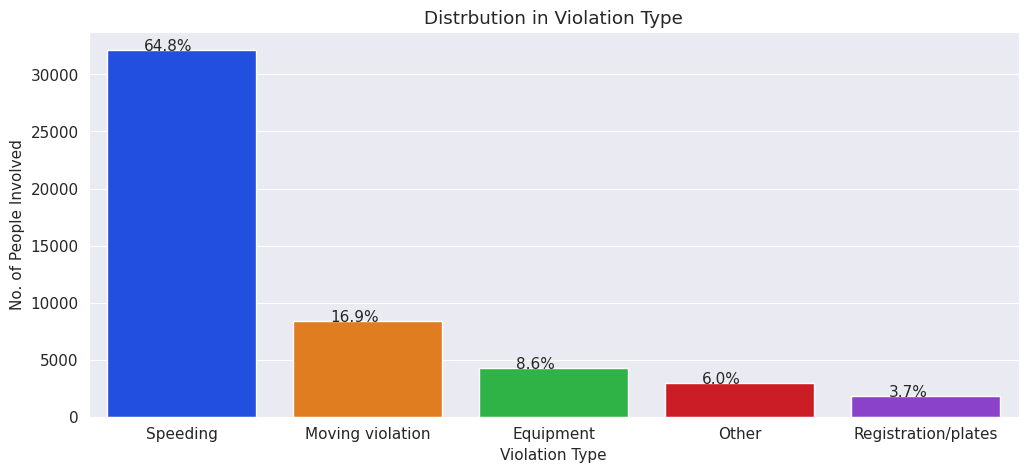

In [57]:
fig , ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x = data.violation, data = data, order = data.violation.value_counts().index, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(data.violation))
    x = i.get_x()+i.get_width()-0.6
    y = i.get_height()
    ax.annotate(percentage, (x, y))
plt.title("Distrbution in Violation Type")
plt.xlabel("Violation Type")
plt.ylabel("No. of People Involved");

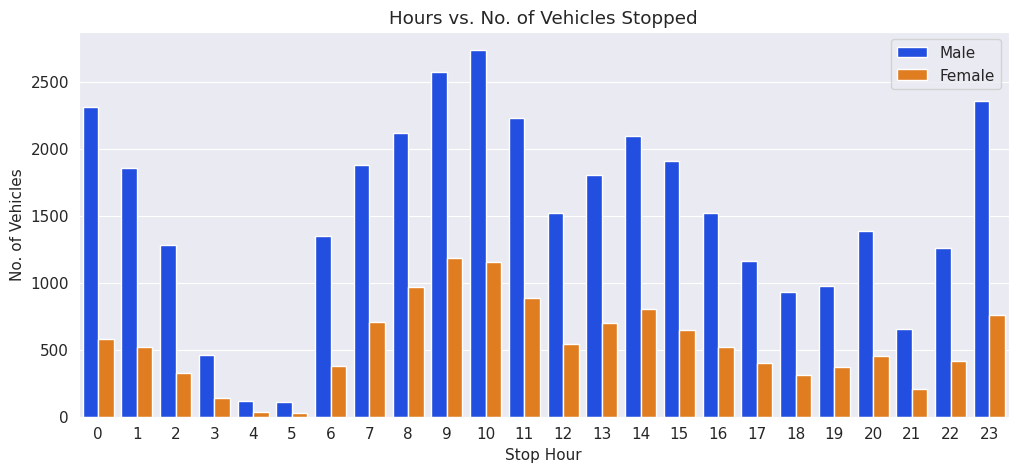

In [58]:
plt.figure(figsize = (12,5))
sns.countplot(x = data.stop_hour,data = data,hue = 'driver_gender', palette = "bright")
plt.title('Hours vs. No. of Vehicles Stopped')
plt.legend(['Male','Female'])
plt.xlabel("Stop Hour")
plt.ylabel("No. of Vehicles");

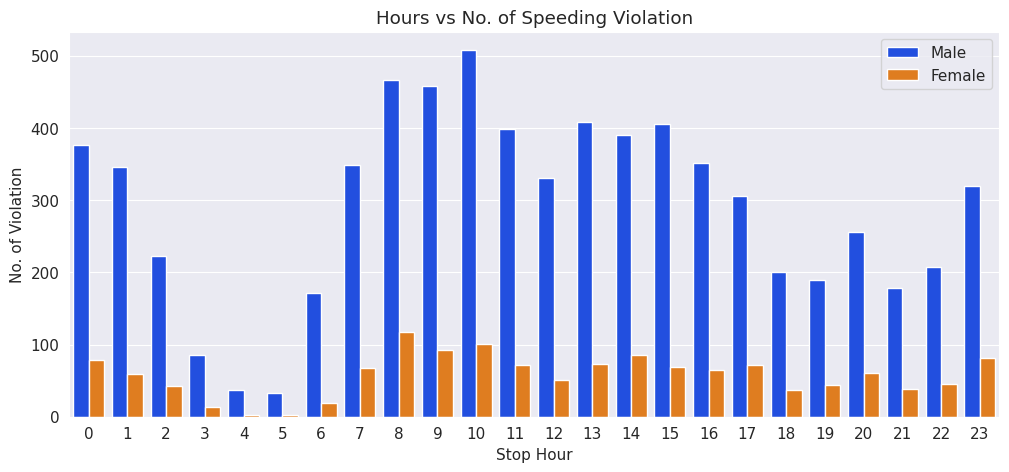

In [59]:
plt.figure(figsize = (12,5))
sns.countplot(x = data[data.violation == 'Moving violation'].stop_hour,data=data[data.violation == 'Moving violation'],
              hue = 'driver_gender', palette = "bright")
plt.title('Hours vs No. of Speeding Violation')
plt.legend(['Male','Female'])
plt.xlabel("Stop Hour")
plt.ylabel("No. of Violation");

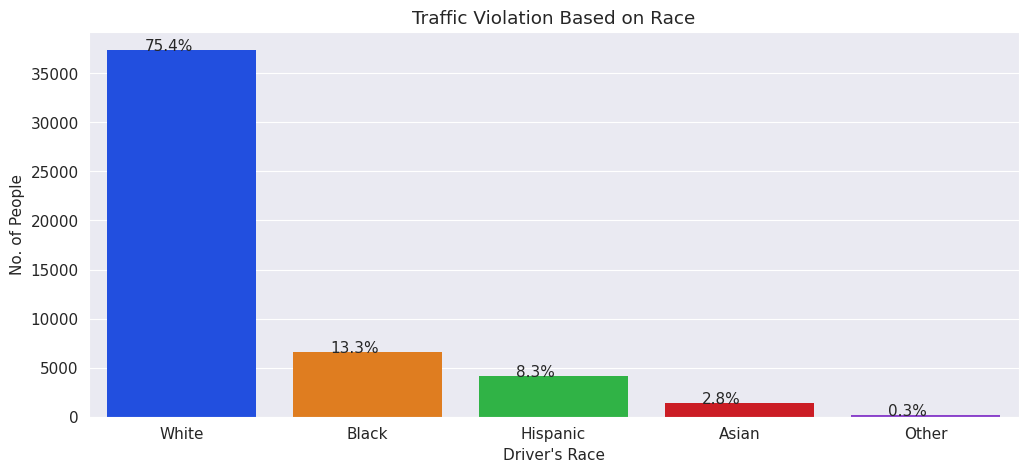

In [60]:
fig , ax = plt.subplots(figsize = (12,5))
ax = sns.countplot(x=data.driver_race, data=data, order = data.driver_race.value_counts().index,
                   linewidth = 0, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(data.driver_race))
    x = i.get_x()+i.get_width()-0.6
    y = i.get_height()
    ax.annotate(percentage, (x, y))
plt.title('Traffic Violation Based on Race')
plt.xlabel("Driver's Race")
plt.ylabel("No. of People");

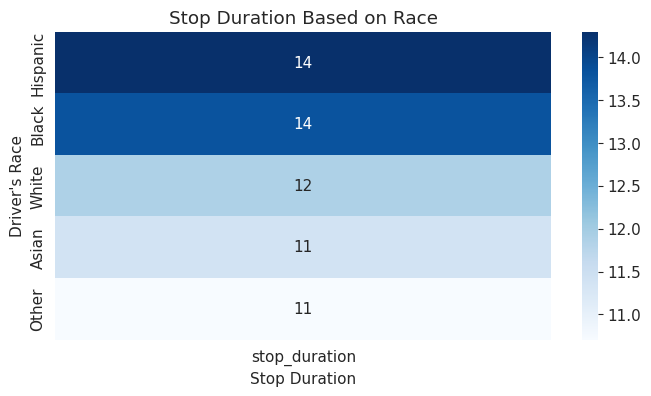

In [65]:
plt.figure(figsize = (8,4))
sns.heatmap(stop_duration_based_on_race.sort_values(by = ['stop_duration'], ascending=False), annot = True, cmap = "Blues");
plt.title("Stop Duration Based on Race")
plt.xlabel("Stop Duration")
plt.ylabel("Driver's Race");

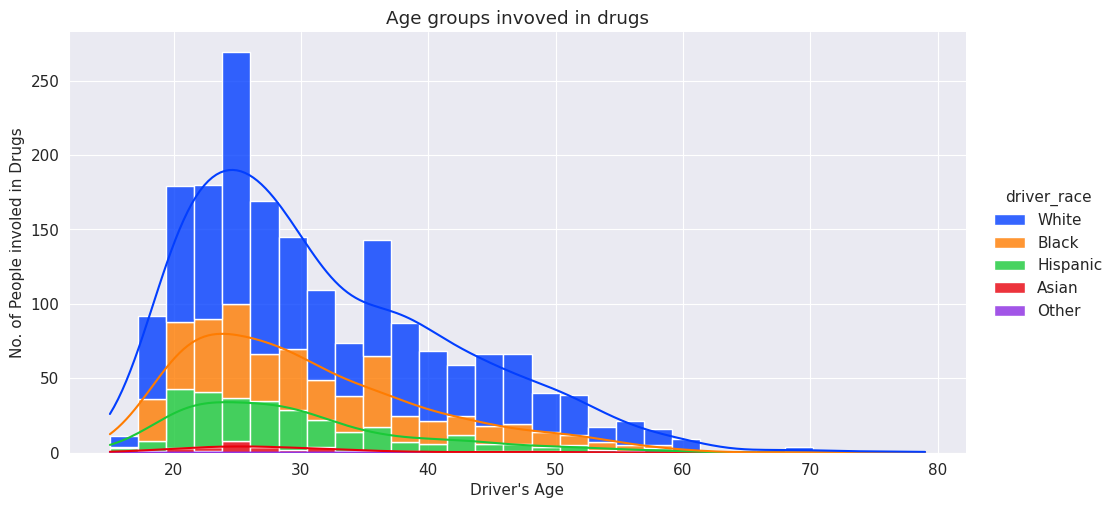

In [63]:
sns.displot(x='driver_age',data = data[data['is_arrested']==True],
            kde = True, hue = 'driver_race', multiple = "stack", alpha = 0.8, palette = "bright", height=5, aspect=2)
plt.title('Age groups invoved in drugs')
plt.xlabel("Driver's Age")
plt.ylabel("No. of People involed in Drugs");

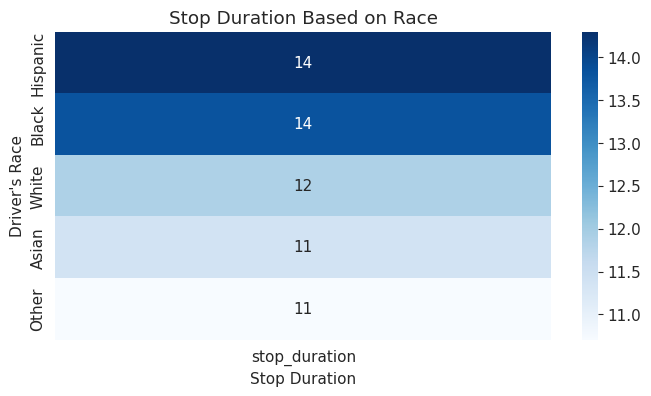

In [67]:
plt.figure(figsize = (8,4))
sns.heatmap(stop_duration_based_on_race.sort_values(by = ['stop_duration'], ascending=False), annot = True, cmap = "Blues");
plt.title("Stop Duration Based on Race")
plt.xlabel("Stop Duration")
plt.ylabel("Driver's Race");

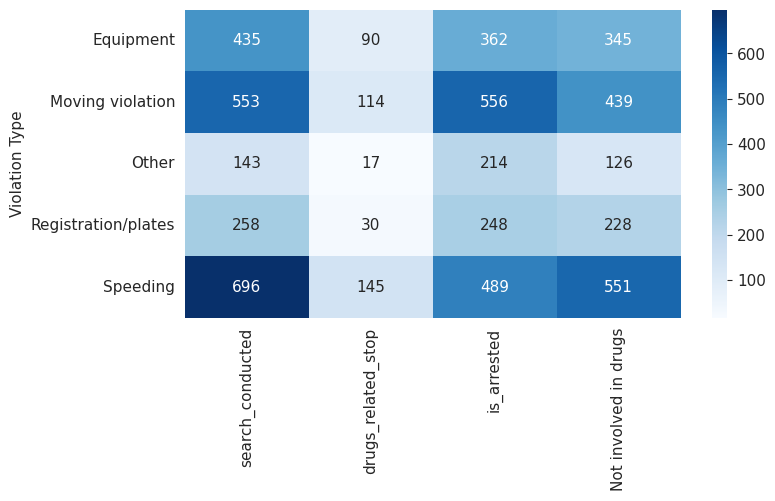

In [73]:
result = data.groupby('violation')[['search_conducted','drugs_related_stop','is_arrested']].sum()
result = result.astype(float)  # convert all columns to float
result['Not involved in drugs'] = result['search_conducted']-result['drugs_related_stop']
plt.figure(figsize = (8,4))
sns.heatmap(result, annot = True, fmt = ".0f", cmap = "Blues");
plt.ylabel("Violation Type");

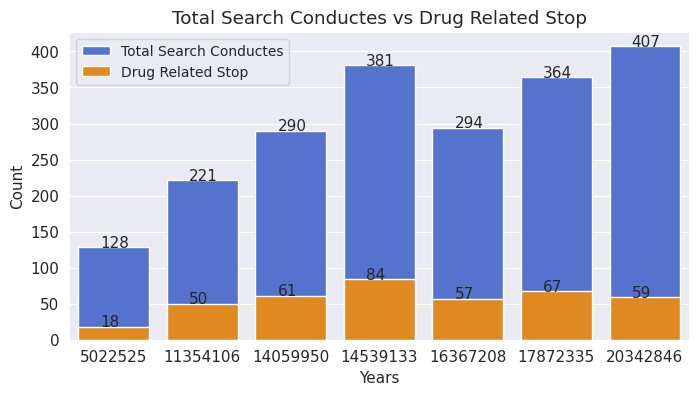

In [74]:
fig, ax = plt.subplots(figsize = (8,4))
sns.barplot(x = yearly_data.stop_Year, y = yearly_data.search_conducted,
            data = yearly_data,label = "Total Search Conductes", color = "royalblue")
sns.barplot(x = yearly_data.stop_Year, y = yearly_data.drugs_related_stop,
            data = yearly_data,label = "Drug Related Stop", color = "darkorange")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.55
    y = i.get_height()
    ax.annotate(count, (x, y))
ax.set_title("Total Search Conductes vs Drug Related Stop")
ax.set(xlabel = "Years", ylabel = "Count")
ax.legend(fontsize = '10');

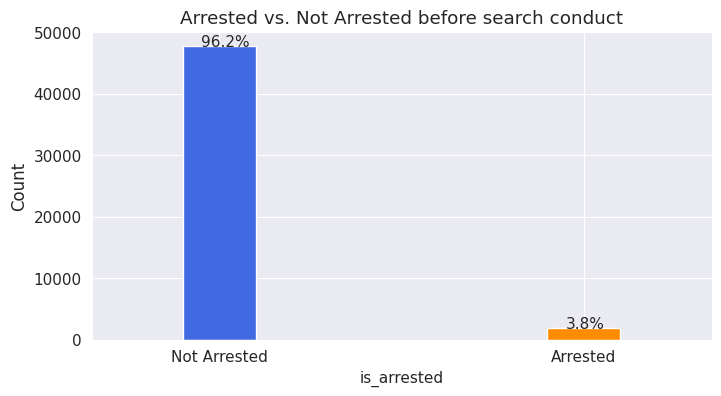

In [75]:
fig, ax = plt.subplots()
fig.canvas.draw()
data.is_arrested.value_counts().plot(kind="bar", width=0.2, figsize=(8, 4), color = ["royalblue","darkorange"])
plt.ylabel("Count", fontsize=12)
plt.title("Arrested vs. Not Arrested before search conduct")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(data.is_arrested))
    x = i.get_x() + i.get_width() - 0.15
    y = i.get_height()
    ax.annotate(percentage, (x, y))
ax.set_xticklabels(["Not Arrested","Arrested"], rotation = 0);

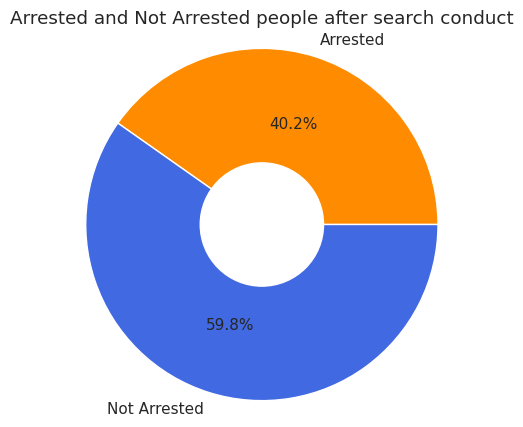

In [71]:
fig, ax = plt.subplots(figsize = (5,5))
ax.pie([arrested, not_arrested], labels = ('Arrested','Not Arrested'),
       autopct = '%1.1f%%', colors = ["darkorange","royalblue"])
centre_circle = plt.Circle((0,0), 0.35, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Arrested and Not Arrested people after search conduct');
ax.axis('equal');

TEST PART 2

AIMING TO IMPLEMENT 'Logistic Regression', 'Decision Tree','K Neighbors', 'Naive Bayes' ML CODES ON IT

In [103]:


initial_dataset = pd.read_csv('/content/drive/MyDrive/traffic_violaions.csv')
initial_dataset.head()

initial_dataset.info()

initial_dataset.isnull().sum()

initial_dataset[initial_dataset.duplicated()]

initial_dataset.shape  #shows (row and column) size in dataset

#statistical measures about the data
initial_dataset.describe()

for item in initial_dataset.columns:
    print(item,"=>",len(initial_dataset[item].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB
stop_

ValueError: could not convert string to float: '1/2/2005'

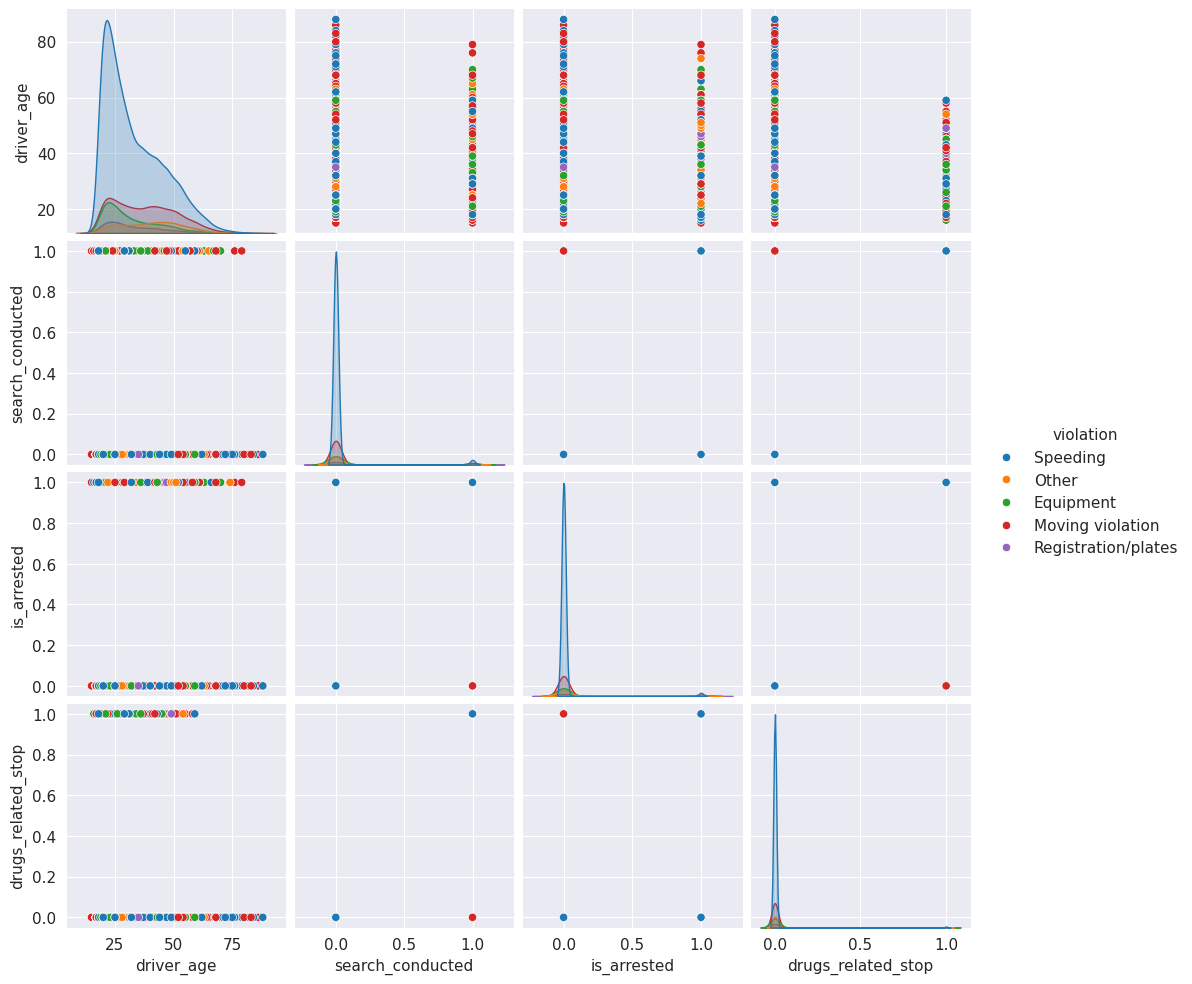

<Figure size 1000x1000 with 0 Axes>

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt


col = ["driver_age", "driver_race", "violation_raw", "violation", "search_conducted", "is_arrested", "drugs_related_stop"]
sns.pairplot(initial_dataset[col], hue="violation")

features = initial_dataset.drop(initial_dataset.columns[-1], axis=1)  # drop 'Class' column - not a feature
fig = plt.figure(figsize=(10, 10))
corr_plot = sns.heatmap(features.corr(), annot=True, cmap='rainbow')
plt.title("Data Correlation plot")
plt.show()

# Checking the distribution
initial_dataset["violation"].value_counts()

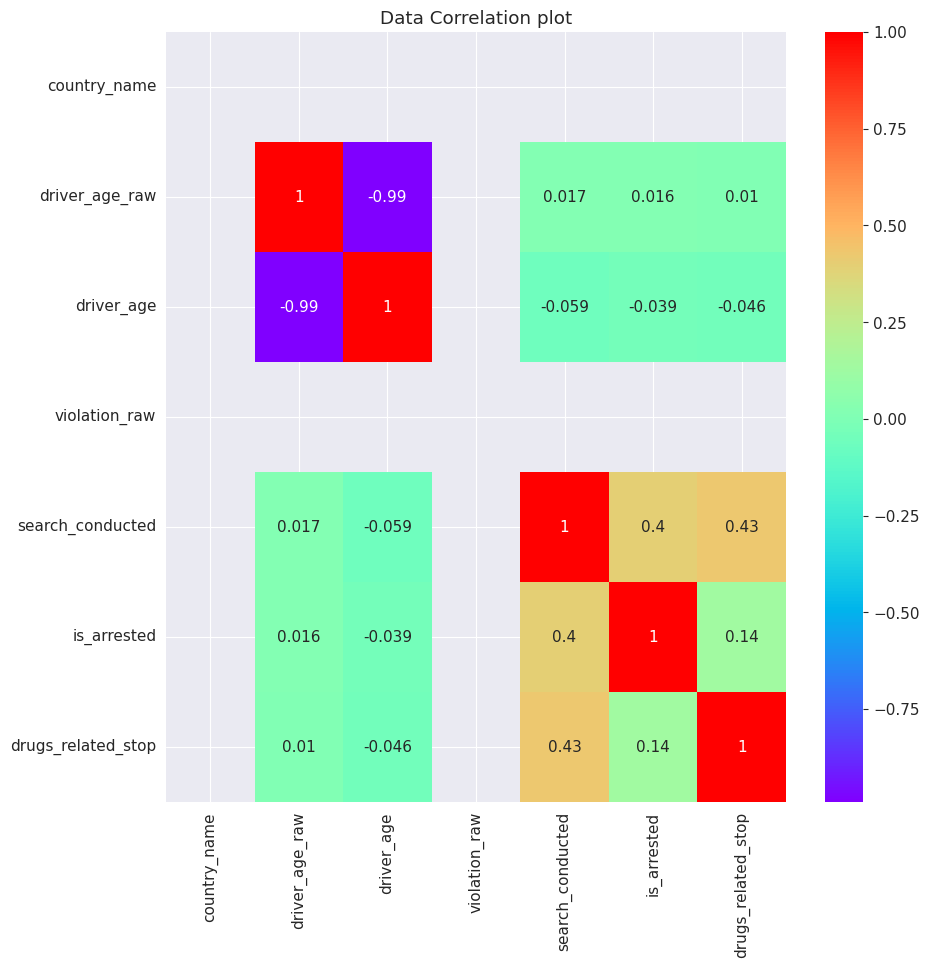

violation
Speeding               32139
Moving violation        8385
Equipment               4276
Other                   2961
Registration/plates     1820
Name: count, dtype: int64


In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


col = ["driver_age", "driver_race", "violation_raw", "violation", "search_conducted", "is_arrested", "drugs_related_stop", "Class"]

numeric_columns = ["driver_age", "search_conducted", "is_arrested", "drugs_related_stop"]
initial_dataset[numeric_columns] = initial_dataset[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert numeric_columns to data types
numeric_dtypes = [pd.Int64Dtype() if col == "search_conducted" else pd.Float64Dtype() for col in numeric_columns]

features = initial_dataset.drop(columns=["violation"]).select_dtypes(include=numeric_dtypes)

fig = plt.figure(figsize=(10, 10))
corr_plot = sns.heatmap(features.corr(), annot=True, cmap='rainbow')
plt.title("Data Correlation plot")
plt.show()

# Checking the distribution
print(initial_dataset["violation"].value_counts())

In [141]:
# Analysis

plt.figure(figsize=(12,12))
col=[LR,RFC,KNN,NB]
name=['LR','RFC','KNN','NB']
print('Highest accuracy:',max(col),'(',name[col.index(max(col))],'Model )\n')
plt.pie(col,labels=name,autopct='%.2f%%')
plt.legend(col)
plt.show()

from sklearn.model_selection import cross_val_score
algorithms = [LR_model,KNN_model,RF,NB_model]
for alg in algorithms:
    accuracies = cross_val_score(estimator=alg, X=features, y=Y, cv=10)
    print("{0}: \t {1}".format(alg,accuracies.mean()))

NameError: name 'LR' is not defined

<Figure size 1200x1200 with 0 Axes>

In [125]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = initial_dataset.drop(['violation'], axis=1)
y = initial_dataset['violation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (42372, 14)
Testing set shape: (10594, 14)


In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores of different models
models = ['Logistic Regression', 'Decision Tree','K Neighbors', 'Naive Bayes']
accuracies = [LR, DTC, KNN, NB]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'purple', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Prediction Accuracies')
plt.ylim([0, 100])  # Set the y-axis limit
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
